# Python for Computational Linguists 1.4: Working with Corpus Data


Welcome to module 1.4. In this module, we will start calculating statistics using real corpus.

Let's first refresh your memory on ngrams and probabilities by completing the following quiz:

## ❓ Pre-module Quiz
Given the sequence `aabbdab`, what is $P(b|a)$?

A. $\large  \frac{1}{2}$

B. $\large \frac{1}{3}$

C. $\large \frac{2}{3}$

D. $0$


<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the answer.</summary>
  <p>The correct answer is C.</p>
  <p>There are in total three bigrams starting with 'a': two 'ab' and one 'aa'. $P(b|a)$ is the probability of the bigram 'ab', which is 2 out of 3, ie. 2/3. </p>
</details>

# Corpus Analysis

## Importing packages

You should remember from the previous Notebook that Python organises code into units called modules. This tutorial is also based on spaCy; let's install it, then we will initialise the default English tokeniser. We will also download another library and the corpora that we need to complete this tutorial.

> **Note**: if you are running this notebook on your machine, you should already have spaCy installed on your server.

In [1]:
# download spaCy
!pip install matplotlib
!pip install spacy
# download spaCy's default resources
!python -m spacy download en_core_web_sm
# download the Shakespeare and Marlowe corpora
!wget https://raw.githubusercontent.com/cambridgeltl/python4cl/master/corpora/Shakespeare
!wget https://raw.githubusercontent.com/cambridgeltl/python4cl/master/corpora/Marlowe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
--2025-11-18 13:30:19--  https://raw.githubusercontent.com/cambridgeltl/python4cl/master/corpora/Shakespeare
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5423810 (5.2M) [text/plain]
Saving to: ‘Shakespeare’

Shakespeare         100%[===================>]   5.17M  --.-KB/s    in 0.05s   

2025-11-18 13:30:19 (103 MB/s) - ‘Shakespeare’ saved [54238

**Double check**: the next output of the next cell should contain 'Marlowe' and 'Shakespeare'. If this is not the case, please contact a teaching assistant for support.

In [2]:
!ls

Marlowe  sample_data  Shakespeare


SpaCy's English class is in a script named `en.py` in the path `spacy/lang/`. To import the class variable, we could do the following:

In [ ]:
import spacy.lang.en #import the path
nlp=spacy.lang.en.English() #call the class variable with full path

In [3]:
import spacy.lang.en as en #this line allows Python to access code from the spacy/lang/en and to rename this code as 'en'
nlp=en.English() #call the class variable with the name

In [ ]:
from spacy.lang.en import English # directly import the class variable
nlp=English() # call the class directly

Now let's initialize a default English tokenizer

In [4]:
tokenizer = nlp.tokenizer

## Processing corpora

Python allows you to read, write and delete files. Here we'll be reading a corpus of Shakespeare's entire works (around 1 million word tokens). The relative path to the corpus file 'Shakespeare' is `./data/shakespeare` (`..` indicates the parent directory). We access this using the `open()` function.



In [5]:
f=open('./Shakespeare','r')

We declared the variable `f` to open the Shakespeare file. `open()` takes 2 arguments, the path to the file that we want to open and a string that represents the kinds of permission or operation we want to do on the file. Here the string is `'r'` which refers to the permission of 'read-only'. We can also create a new file to write by replacing `'r'` with `'w'`. If we want to append data to the file, we can replace `'r'` with `'a'`.

Remember to close the `f` variable after finishing reading:


In [6]:
f.close()

A more recommendable way is to use `with` keyword so that the file will be properly closed after its suite finishes

In [7]:
with open('./Shakespeare','r') as f:
    print ('test')

test


We could use `readlines()` to read in all the lines from the corpus in to a list of strings. We store the list in the variable `lines` .   

In [8]:
with open('./Shakespeare','r') as f:
    lines=f.readlines()

Let's have a look of what the variable `lines` contains by printing out the first ten items.

In [9]:
lines[:10]

['1609\n',
 '\n',
 'THE SONNETS\n',
 '\n',
 'by William Shakespeare\n',
 '\n',
 '\n',
 '\n',
 '                     1\n',
 '  From fairest creatures we desire increase,\n']

Have you noticed that each line is followed by the special character `\n`? This character identifies the end of a line of text, and is called a [control character](https://en.wikipedia.org/wiki/Control_character). These type of characters do not represent textual symbols but represent particular instruction (e.g. "create a new line") that is processed by the computer; another common control character is `\t` or "tabulation character", which is inserted when you press the 'Tab' key on your keyboard. Control characters **do not** show up in text but **do show up** in string variables, so we will have to come up with a way to deal with them.

Another observation is that some lines such as the last line starts with some space characters. We can get rid of these characters by calling the string method `strip()` that will automatically strip a string with whitespace characters including space, tabs, and control characters both from the start or at the end of the string.

Let's write a for loop to process each line of the file and store the processed lines as tokenized word lists into the variable `lines_processed`.

In [10]:
lines_processed=[] # a list to store the processed lines
with open('./Shakespeare','r') as f:
    for line in f:
        #for each line, we do:
        #1. remove whitespace characters like \t \r \n
        line=line.strip()
        #2. skip the empty lines
        if line=='':
            continue
        else:
            #3. tokenize the sentence into word list:
            tokens=tokenizer(line) #the tokenizer() function that we imported return a series of token items which are now Spacy classes
            # To convert each item in tokens to strings, we need to loop over the line again and convert each token to strings by calling str()
            tokens_str=[]
            for tok in tokens:
                tokens_str.append(str(tok))# str() converts into a string
            lines_processed.append(tokens_str)

We can wrap up the above into a function to process files

In [11]:
def process(filename):
    '''
    process file into a list of lines where each line is a list of words

    Parameters
    ----------
    filename : file path

    Returns
    -------
    a list of list of strings
    [
        [1609]
        [THE, SONNETS]
        ...
    ]
    '''
    lines_processed=[] # a list to store the processed lines
    with open(filename,'r') as f:
        for line in f:
            #for each line, we do:
            #1. remove whitespace characters like \t \r \n
            line=line.strip()
            #2. skip the empty lines
            if line=='':
                continue
            else:
                #3. tokenize the sentence into word list:
                tokens=tokenizer(line) #the tokenizer() function that we imported return a series of token items which are now Spacy classes
                # To convert each item in tokens to strings, we need to loop over the line again and convert each token to strings by calling str()
                tokens_str=[]
                for tok in tokens:
                    tokens_str.append(str(tok))# str() converts into a string
                lines_processed.append(tokens_str)
    return lines_processed

Call the function `process()`:

In [12]:
lines_processed=process('./Shakespeare')

Let's take a look of the lines after tokenisation. Let's print out the first ten lines:
Do you think the tokenizer is doing well?

In [13]:
lines_processed[:10]

[['1609'],
 ['THE', 'SONNETS'],
 ['by', 'William', 'Shakespeare'],
 ['1'],
 ['From', 'fairest', 'creatures', 'we', 'desire', 'increase', ','],
 ['That', 'thereby', 'beauty', "'s", 'rose', 'might', 'never', 'die', ','],
 ['But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', ','],
 ['His', 'tender', 'heir', 'might', 'bear', 'his', 'memory', ':'],
 ['But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', ','],
 ["Feed'st",
  'thy',
  'light',
  "'s",
  'flame',
  'with',
  'self',
  '-',
  'substantial',
  'fuel',
  ',']]

You can also check how many lines the corpus contains by calling `len()` function over `lines_processed`.

In [14]:
len(lines_processed)

114422

> **<h3>💻 Try it yourself!</h3>**

In the following cell, please try processing the other corpus 'Marlowe' in the same directory of 'Shakespeare', and store the processed results in variable: `marlowe_processed`.

Then, Answer the following question:

How many lines does Marlowe corpus contain?

A. 19492

B. 114422

C. 1949

D. 45336

You can insert your code here:

In [49]:
marlowe_processed = process('./Marlowe') #use previous function but for new File, the function will take this new Marlow to be the parameter - we assign it to the variable marlowe_processed
len(marlowe_processed) #then prcoess through the function len() to find out how many lines - the number of strings

19492

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>the answer is A</p>
    <p>You can try the following code: </p>
    <p><code>marlowe_processed=process('./Marlowe')</code></p>
    <p><code>len(marlowe_processed)</code></p>
    
  


    
</details>

## Dictionary

A dictionary is a collection which is unordered, changeable and indexed.
In Python dictionaries are written with curly brackets, and they have keys and values.
For example:

In [18]:
thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

You can access the items of a dictionary by referring to its key name, inside square brackets:

In [19]:
thisdict['brand']

'Ford'

You can change the value of a specific item by referring to its key name:

In [20]:
print(thisdict['year'])
thisdict['year']=2019
print(thisdict['year'])

1964
2019


Adding an item to the dictionary is done by using a new index key and assigning a value to it:

In [21]:
thisdict["color"] = "red"
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 2019, 'color': 'red'}


You can loop through a dictionary by using a for loop

In [22]:
#Print all key names in the dictionary, one by one:

for x in thisdict:
  print(x)

brand
model
year
color


In [23]:
#Print all values in the dictionary, one by one:

for x in thisdict:
  print(thisdict[x])

Ford
Mustang
2019
red


In [24]:
#You can also use the values() function to return values of a dictionary:

for x in thisdict.values():
  print(x)

Ford
Mustang
2019
red


In [25]:
#Loop through both keys and values, by using the items() function:
for x, y in thisdict.items():
  print(x, y)

brand Ford
model Mustang
year 2019
color red


To determine if a specified key is present in a dictionary use the `in` keyword:

In [26]:
if "model" in thisdict:
  print("Yes, 'model' is one of the keys in the thisdict dictionary")

Yes, 'model' is one of the keys in the thisdict dictionary


To determine how many items (key-value pairs) a dictionary has, use the `len()` method.

In [27]:
#Print the number of items in the dictionary:
print(len(thisdict))

4


## Counting Vocabulary

Now let's loop over the word lists in `lines_processed` to create a vocabulary dictionary:

In [28]:
vocab={}# create an empty vocabulary dictionary to store words as keys and counts as values later.
for line in lines_processed:
    for word in line:
        if word in vocab:
            vocab[word]+=1 # update the count for an existing word
        else:
            vocab[word]=1 # initilize the count for a new word


Again, we can wrap the above into a function

In [29]:
def create_vocab_dict(f_processed_arg):
    '''
    Collect vocabulary counts from text

    Parameters
    ----------
    f_processed_arg: a list of list of words processed from text as the output of process()

    Returns
    -------
    a dictionary with words (str) as keys and counts(int) as values
    vocab={
    'SONNETS': 1
    }
    '''
    vocab={}# create an empty vocabulary dictionary to store words as keys and counts as values later.
    for line in f_processed_arg:
        for word in line:
            if word in vocab:
                vocab[word]+=1 # update the count for an existing word
            else:
                vocab[word]=1 # initilize the count for a new word
    return vocab

We can call the function:

In [30]:
vocab=create_vocab_dict(lines_processed)

We can then retrieve the count of a specific word by the statement `vocab[word]`, eg. the count of 'thee' in the corpus should be 3144.

In [31]:
vocab['thee']

3144

### ❓ Quiz  


Use the following cell to retrieve the counts of the following pronouns in Shakespeare: 'thou','thee','thy','thine','you','your'. Which order of the word counts is correct?

A. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

B. 'you'>'your'>'thou'>'thy'>'thee'>'thine'

C. 'thou'>'you'>'thy'>'thine'>'your'>'thee'

D. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

You can insert your code here:

In [48]:
vocab["thine"]

437

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>the answer is B</p>

    

</details>

### ❓ Quiz  

Please collect a vocabulary dictionary from 'Marlowe' as well in the following cells, and answer the same question:

Which order of the word counts is correct in Marlowe?

A. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

B. 'you'>'your'>'thou'>'thy'>'thee'>'thine'

C. 'thou'>'you'>'thy'>'thine'>'your'>'thee'

D. 'you'>'thou'>'your'>'thy'>'thee'>'thine'

You can insert your code here:

In [53]:
marlowe_vocab = create_vocab_dict(marlowe_processed) #the variable for the vocab is marlowe_vocab! not vocab that is shakespeare!

second_person = ["thine", "you", "your", "thou", "thy", "thee" ]

for word in second_person:
  if word in marlowe_vocab:
    print(marlowe_vocab[word])



64
1194
785
859
677
541


<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>the answer is A</p>
    <p>You can try the following code: </p>
    <p><code>vocab_marlowe=create_vocab_dict(marlowe_processed)</code></p>
        <p><code>vocab_marlowe['thine']</code></p>

    
</details>

If you find the section easy so far, you can go on to try the following optional section on Type-token ratio. Otherwise, you can skip the following section.




## Calcuating Type-token ratio (Optional)

**Type-token ratio (TTR)** is the ratio obtained by dividing the **types** (the total number of different words) occurring in a text or utterance by its **tokens** (the total number of words). A high TTR indicates a high degree of lexical variation while a low TTR indicates the opposite. The range falls between a theoretical 0 (infinite repetition of a single type) and 1 (the complete non-repetition found in a concordance).

Let's calculate type count first:

In [54]:
#Recall that vocab stores words as keys. Let's first retrieve the key list of the vocab dictioanry:
key_list=vocab.keys()
# the number of types is just the length of the key list
type_count=len(vocab.keys())
print (type_count)

32882


Let's caculate token count:

In [55]:
# Let's create a loop to aggregate the token counts in the vocabulary:
token_count=0
for word in vocab:
    token_count+=vocab[word] # equals token_count=token_count+vocab[word]
print (token_count)


1133317


In [56]:
#Let's calculate the type-token ratio:
ttr=type_count/token_count
print (ttr)

0.029013947553950044


Alternatively, we could wrap the calculation up into a function that takes in vocab dictionary and outputs the ttr

In [60]:
def ttr_cal(vocab_arg):
    '''
    calculate type-token ratio

    Parameters
    ----------
    vocab_arg: a vocab dictionary with words as keys and counts as values

    Returns
    -------
    a float number indicating type-token ratio
    '''
    type_count=len(vocab_arg.keys())
    token_count=0
    for word in vocab_arg:
        token_count+=vocab_arg[word]
    ttr=type_count/token_count
    return ttr

In [ ]:
print (ttr_cal(vocab))

> **<h3>💻 Try it yourself!</h3>**

Use the above functions to calculate the type-token ratio of Marlowe corpus and compare the results with the Shakespeare corpus. Who has more lexical variation?

You can write your code below:

In [62]:
vocab_marlowe=create_vocab_dict(marlowe_processed)

ttr_cal(vocab_marlowe)

0.04851176909872077

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: 0.04902041788375269 (Marlowe seems to have more lexical variation)</p>
    <p>You can try the follwing code to find out: </p>
    <p><code>vocab_marlowe=create_vocab_dict(marlowe_processed)</code></p>
    <p><code>ttr_cal(vocab_marlowe)</code></p>




</details>

## Plotting a frequency distribution

To create graphs in Python, we can make use of a Python library `matplotlib`. Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. In the following line, we import the `pyplot` module from `matplotlib` and rename as `plt`.

In [63]:
import matplotlib.pyplot as plt


Now let's try ploting a toy histogram with two words and their counts: a (3) and b (5).


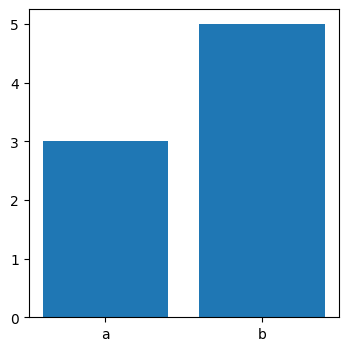

In [64]:
#We first create a figure:
plt.figure(figsize=(4,4)) #4,4 determine the figure size
#plot the historgram with the first argument as a list of labels i.e. words and the second argument as a list of counts
plt.bar(['a','b'],[3,5])
#finally we show the plot by calling:
plt.show()

We provide the following function `produce_words_counts` to select a list of words and their counts as input for making the graph. We first sort the vocabulary from high frequency to low frequency. We can define the range of the vocabulary by changing `rank_start` and `rank_end`. `rank_start` specifies the rank of the top frequency word and `rank_end` specifies the rank of the low frequency word of the range.



In [66]:
def produce_words_counts(vocab,rank_start,rank_end):
    '''
    produce words and counts for plotting graphs

    Parameters
    ----------
    vocab: a vocab dictionary with words as keys and counts as values
    rank_start: the start rank of the high frequency words
    rank_end: the end rank of the low frequency words

    Returns
    -------
    words: a list of words from rank_start to rank_end
    counts: a list of teh respective counts of words

    '''
    # 1. Sort the vocabulary according to frequency. It returns sorted pairs of (word,count) for the range defined between rank_start and rank_end.
    # Please don't worry if you can't understand this part
    vocab_sorted=sorted(vocab.items(),key=lambda x: x[1],reverse=True)[rank_start:rank_end]
    # loop through the sorted vocabulary to get words and their respective counts for plotting the graphs later on
    words=[]
    counts=[]
    for w_c in vocab_sorted:
        w=w_c[0]
        words.append(w)
        count=w_c[1]
        counts.append(count)
    return words, counts


Try changing `rank_start` and `rank_end` to produce different `words` and `counts` lists. For example, to retrieve the top 100 words, simply run `words,counts=produce(vocab,0,100)`

In [67]:
words,counts=produce_words_counts(vocab,0,100)

We could now plot a histogram using the words and counts

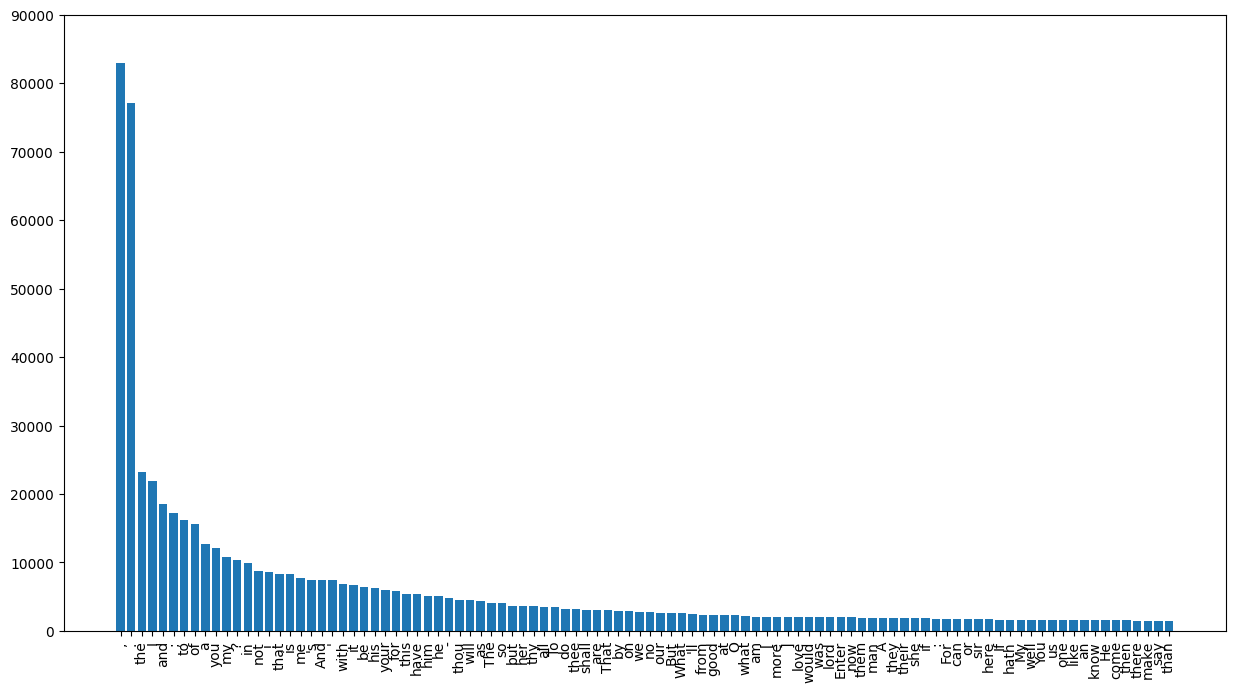

In [68]:


plt.figure(figsize=(15,8)) #figure size
plt.bar(words,counts) #plot the historgram
plt.ylim(0,90000) # specifies the minimum and maximum of the y axis.
plt.xticks(rotation=90) # rotate the x label
plt.show()


> **<h3>💻 Try it yourself!</h3>**

Try changing `rank_start` and `rank_end` and observe what kind of words the top-frequent words are? What about the low-frequent words?  How many top-frequent words do we have? How many low-frequent words do we have?

In addition, you can try changing the arguments of `plot.ylim()` to adjust the y axis. For example, you may want to lower the maximum when examining the lower rank words.


<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: Top frequent words tend to be function words. There are only a small number of them with very large number. There is also a long tail of low-frequent words. </p>
    



</details>

## Counting bigrams

A bigram is a sequence of adjacent two words. Let's create a dictionary to store the bigrams. The key will be each bigram and the value will be counts. We can extract bigrams by looping through the items in `lines_processed`. Recall that `lines_processed` is a list that contains the tokenized corpus.

We also need to insert `<start>` and `<end>` tokens in each line so that we can model probabilities of the words in the start and at the end of a sentence.



When looping through the list, we are looping over the items of the list. What if we want to loop over the index of each item as well? A useful function to use is `enumerate()` that allows us to loop over both the index and the item. We will see how it is used in the following:

In [69]:
bigram_dict={}
#update start and end token's counts in the vocab variable
vocab['<start>']=0
vocab['<end>']=0

for line in lines_processed:
    #insert start <start> and end <end> token, and update their unigram counts
    line=['<start>']+line+['<end>']
    vocab['<start>']+=1
    vocab['<end>']+=1
    for i,w in enumerate(line):
        #'enumerate() loops over the variables i (the index of the current word) and w (the string of
        #the current word)
        w_first=w
        if i+1<len(line): #not the end of the line
            w_second=line[i+1]
            bigram=(w_first,w_second) #a tuple to represent bigram
            if bigram not in bigram_dict:
                bigram_dict[bigram]=1
            else:
                bigram_dict[bigram]+=1




> **<h3>💻 Try it yourself!</h3>**

What is the size of the bigram dictionary ie. how many bigrams do we have in the corpus? If you compare with the size of the `vocab` which is basically a unigram dictionary, are you surprised by the difference?

In [80]:
bigram_dict["his", "beauty"] #bigram stores the key as tuples, so to find the value of phrase search it up as a tuple


7

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: 315400 </p>
    <p>You can try the follwing code to find out: </p>
    <p><code>len(bigram_dict)</code></p>


</details>

> **<h3>💻 Try it yourself!</h3>**

Is gender associated with beauty? Try retrieving the count of 'his beauty' and 'her beauty'? Which has more counts?

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: 'her beauty' occurs more often than 'his beauty', which might indicates that 'beauty' is more associated with women than with men. </p>


</details>

# Language modelling

Language modelling is a fundamental task in computational lingustics where the aim is to predict the probablity of a sequence of tokens occuring. We will consider tokens to be words in this exercise, but they can be many other things depending on the application (perhaps characters, utterances, phonemes, _etc_).

Formally, we want to estimate the probablity $P(w_{1},\ldots ,w_{m})$ of an $m$-length sequence, using some given corpus.

There are many techniques for language modelling; we will consider here a very simple approach called $n$-gram models. These models make the assumption that the probability of a word only depends on the previous $n-1$ context words in the sequence. If $n=1$, we call this a *unigram* model, if $n=2$, it's a *bigram* model etc.

So for example, given a sequence of words: *'to be or not to'* what is the probablity the next word will be *'be'*?  In $n$-gram models, this is calculated using *conditional probablity*: $P(\text{'be'}\mid \text{'to be or not to'})$ where we estimate the probablity of the entire sequence using the probablity chain rule (_i.e_. multiplying the conditional probabilities of the sequence):


$$P(w_{1},\ldots ,w_{m})=\prod _{{i=1}}^{m}P(w_{i}\mid w_{1},\ldots ,w_{{i-1}})\approx \prod _{{i=1}}^{m}P(w_{i}\mid w_{{i-(n-1)}},\ldots ,w_{{i-1}})$$

We can estimate the conditional probility from our training corpus by simply counting:

$$P(w_{i}\mid w_{{i-(n-1)}},\ldots ,w_{{i-1}})={\frac  {{\mathrm  {count}}(w_{{i-(n-1)}},\ldots ,w_{{i-1}},w_{i})}{{\mathrm  {count}}(w_{{i-(n-1)}},\ldots ,w_{{i-1}})}}$$

## Unigram language model
Let's start by building the most basic $n$-gram model, a unigram model where the conditional probablity for each word is simply the probablity of the word occuring in the corpus data: it does not dependent on any of the previous words in the sequence.

We can start by defining a function called *unigram_prob* which calculates the unigram probability given the unigram word and the vocabulary counter as input parameters

In [81]:
def unigram_prob(word,vocab,token_count):
    '''
    produce a word's unigram probability

    Parameters
    ----------
    vocab: a vocab dictionary with words as keys and counts as values
    word: a given unigram word
    token_count: the total number of tokens in the corpus

    Returns
    -------
    prob: the unigram probability of the word
    '''
    prob=float(vocab[word]/token_count)
    return prob

Let's test this by calculating the probability of the word "horse" occuring in the corpus of Shakespeare (remember `vocab` is the unigram dictionary we have computed for the Shakespeare corpus, and `token_count` is the total token number in the corpus):

In [82]:
unigram_prob("horse",vocab,token_count)

0.00021176775782945107

> **<h3>💻 Try it yourself!</h3>**

Calculate the probability and the effect of capitalisation on the definite article. Try "The" vs "THE" vs "the", and note how much the probability differs

In [85]:
unigram_prob("the", vocab, token_count)

0.0205044131518366

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: The: 0.00354534834062168, THE: 0.00010323687303452877, the: 0.02050443124424256 </p>

  <p>You can try the following code </p>
  <p><code>unigram_prob("The",vocab,token_count) </code></p>
  <p><code>unigram_prob("THE",vocab,token_count) </code></p>
   <p><code>unigram_prob("the",vocab,token_count)</code></p>
  

    


</details>

To calculate the probability of a sequence (a sentence, paragraph, _etc_.) occurring, we use the chain rule of probability by multiplying the unigram probability of individual words. So lets calculate the probability of the sequence: *'To be, or not to be, that is the question:'*

In [86]:
unigram_prob("To",vocab,token_count) * unigram_prob("be",vocab,token_count) * unigram_prob("or",vocab,token_count)* unigram_prob("not",vocab,token_count) * unigram_prob("to",vocab,token_count) * unigram_prob("be",vocab,token_count) * unigram_prob(",",vocab,token_count) * unigram_prob("that",vocab,token_count) * unigram_prob("is",vocab,token_count) * unigram_prob("the",vocab,token_count) * unigram_prob("the",vocab,token_count) * unigram_prob("question",vocab,token_count) * unigram_prob(":",vocab,token_count)

5.408092366907272e-30

The probablity value of our example sequence is a very small number! In fact, it is so small that it's about the same probability of picking the same ant thrice at random from all the ants on the planet!

What happens if we continue to add further words to this sequence?  

## Log-probability

Eventually the probability values will get so tiny that computers will not be able to represent them correctly in memory; this is known as an *underflow error*.  It will not require much more text to get an underflow error: a simple paragraph using our unigram model will result in zero!

Fortunately, there is a very simple way to avoid this: we can use log-probability instead of regular probability. To do so, we can use python's pre-built function `log()` from the `math` package. We can simply use the log function in our unigram_prob function as follows:

In [87]:
import math

def unigram_prob(word,vocab,token_count):
    '''
    produce a word's unigram log probability

    Parameters
    ----------
    word: a given unigram word
    vocab: a vocab dictionary with words as keys and counts as values
    token_count: the total count of all words

    Returns
    -------
    prob: the unigram log probability of the word
    '''
    logprob=math.log(float(vocab[word]/token_count))
    return logprob

Now let's try calculacting the log-probability for the word "horse":

In [88]:
unigram_prob("horse",vocab,token_count)

-8.460020365707733

To calculate the log-probability of an entire sequence, we simply add the individual log-probablity values of individual unigrams instead of multiplying them.

Let's write a function that calculates the log-probability of a given text sequence (as a single string). The function must tokenize the input string correctly before performing the calculation.

In [89]:
def unigram_prob_for_sequence(tokens,vocab,token_count):
    '''
    produce the total unigram log probability of a sequence

    Parameters
    ----------
    tokens: a list of words in the sequence
    vocab: a vocab dictionary with words as keys and counts as values
    token_count: the total count of all words

    Returns
    -------
    prob_sum: the sum of the unigram log probability of a sequence
    '''
    unigram_probs=[]
    for tok in tokens:
        unigram_probs.append(unigram_prob(tok,vocab,token_count))
    prob_sum=sum(unigram_probs)
    return prob_sum

Let's now calculate the log-probablity of our example sequence:

In [90]:
text = "To be, or not to be, that is the question:"
example_sequence = [str(tok) for tok in tokenizer(text)]
unigram_prob_for_sequence(example_sequence,vocab,token_count)

-66.11614690695852

> **<h3>💻 Try it yourself!</h3>**

Calculate the log-probability of the sentence: *'A horse, a horse! My kingdom for a horse!'*.

Is this sequence more or less likely to occur than *"To be, or not to be, that is the question:"* ?

In [91]:
horse = "A horse, a horse! My kingdom for a horse!"
horse_sequence = [str(tok) for tok in tokenizer(horse)]
unigram_prob_for_sequence(horse_sequence, vocab, token_count)

-74.2161391329241

<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: -74.2155017817561 (much less likely to occur than "To be, or not to be, that is the question:"</p>
    <p>You can try the follwing code to find out: </p>
    <p><code>text = "A horse, a horse! My kingdom for a horse!"</code></p>
    <p><code>tokens = [str(tok) for tok in tokenizer(text)]</code></p>
    <p><code>unigram_prob_for_sequence(tokens,vocab,token_count)</code></p>




</details>

## Bigram language model

Unlike the unigram language model above, a bigram language model uses the context history. It uses conditional probability to estimate the probability of a word occuring relative to the occurance of its predecessor in the sequence:

$$P(w_{i}\mid w_{i-1})={\frac  {{\mathrm  {count}}(w_{i-1},w_{i})}{{\mathrm  {count}}(w_{i-1})}}$$

Let's implement a bigram_prob function that calculates the bigram conditional probability for a single token:


In [92]:
def bigram_prob(w1, w2,vocab,bigram_dict):
    '''
    produce the bigram conditional log probability of P(w2|w1)

    Parameters
    ----------
    w1: the first word of the bigram
    w2: the second word of the bigram
    vocab: a vocab dictionary with words as keys and counts as values
    bigram_dict: a bigram dictionary with bigrams (tuple of words) as keys and counts as values

    Returns
    -------
    logprob: the sum of the unigram log probability of a sequence
    '''
    logprob=math.log(float(bigram_dict[(w1,w2)]/vocab[w1]))
    return logprob

Let's test this by calculating the conditional log-probability for the bigram "to be", i.e., the log-probability of the word "be" given the word "to" appearing before it. We will use the unigram dictionary `vocab` and the bigram dictionary `bigram_dict` computed from Shakespeare.

In [93]:
bigram_prob("to", "be",vocab,bigram_dict)

-3.005079003726104

As before, we can write a function to calculate the log-probability for a sequence of text using our bigram language model.

In [94]:
def bigram_prob_for_sequence(tokens,vocab,bigram_dict):
    '''
    produce the total unigram conditional log probability of a sequence

    Parameters
    ----------
    tokens: a list of words in the sequence
    vocab: a vocab dictionary with words as keys and counts as values
    bigram_dict: a bigram dictionary with bigrams (tuple of words) as keys and counts as values

    Returns
    -------
    bigram_prob_sum: the sum of the bigram log probability of a sequence
    '''
    bigram_probs=[]
    token_len=len(tokens)
    tokens=['<start>']+tokens+['<end>']
    for i,w in enumerate(tokens):
        #'enumerate() loops over the variables: i (the index of the current word) and w (the string of
        #the current word)
        w_first=w
        w_second=tokens[i+1]
        if w_second=='<end>': # until the end token of the line
            break
        bigram_probs.append(bigram_prob(w_first,w_second,vocab,bigram_dict))
    assert token_len==len(bigram_probs)
    bigram_prob_sum=sum(bigram_probs)
    return bigram_prob_sum


Let's use this function to calculate the log probability of our example sequence, and compare it to the unigram language model.

In [95]:
unigram_prob_for_sequence(example_sequence,vocab,token_count) # log-probability using unigram

-66.11614690695852

In [96]:
bigram_prob_for_sequence(example_sequence,vocab,bigram_dict) # log-probability using bigram

-53.550152945254695

It is interesting to note that the log-probability value using the bigram model is substantially larger (the sequence is much likelier to occur). Is this perhaps because the bigram language model takes the context history into account whereas a unigram language model does not?

We discuss how to correctly evaluate language models in the next section.

> **<h3>💻 Try it yourself!</h3>**

Calculate and compare the unigram and bigram log-probabilities of the sentence: *'Double, double, toil and trouble; fire burns, and cauldron bubble.'*

In [103]:
text = "Double, double, toil and trouble; fire burns, and cauldron bubble."
tok_text = [str(tok) for tok in tokenizer(text)]
print(unigram_prob_for_sequence(tok_text, vocab, token_count)) #must tokenise text first as unigrams works based off of the tokens

print(bigram_prob_for_sequence(tok_text, vocab, bigram_dict))

-107.52230145085585
-76.82963768868697


<hr>    <!-- please remember this! -->
<details>
  <summary>Click <b>here</b> to see the code and the answer.</summary>
    <p>The answer: Unigram: -107.52222338091987, Bigram: -76.82963768868697</p>
    <p>You can try the follwing code to find out: </p>
    <p><code>text = "Double, double, toil and trouble; fire burns, and cauldron bubble."</code></p>
    <p><code>tokens = [str(tok) for tok in tokenizer(text)]</code></p>
    <p><code>unigram_prob_for_sequence(tokens,vocab,token_count) # log-probability using unigram</code></p>
    <p><code>bigram_prob_for_sequence(tokens,vocab,bigram_dict) # log-probability using bigram </code></p>



</details>

## Evaluating language models

Language models are evaluated using *perplexity* ($P$), a measure of how well a probability model predicts a given sample (e.g. text sequences).

Perplexity is defined as $P = 2^{{h(s)}}$ where $h$ is the information entropy per word for a given input $s$. $h(s)$ can be calculated as follows:

$$h(s)=\frac{-1}{|s|}\sum _{w \in s}\log _{2}P(w)$$

Here, $s$ is some sample text and $|s|$ is the number of tokens in $s$.

The value of perplexity can be thought of as the number of choices the model needs to make on average per token of the input sequence. The lower the perplexity score, the better the language model is since the model has fewer choices on average for the input sequence.

Let's implement a simple function to calculate the perplexity, taking as input the sum of the log-probability for a sequence (calculated by a language model) and the length of a sequence (in number of tokens).

In [104]:
def perplexity(log_prob, length):
    '''
    produce the per token perplexity of a log probability of a sequence

    Parameters
    ----------
    log_prob: the sum of the log-probability of a sequence
    length: length of the sequence

    Returns
    -------
    p: token-level perplexity
    '''
    H =  - (log_prob/ math.log(2)) / length  #change of log-base from base 10 to base 2, then normalize by length
    p = math.pow(2,H)
    return p

Let's calculate the perplexity of both language models by simply calling the respective functions, and feed the results to the perplexity function above along with the length of the example sequence:

In [105]:
perplexity(bigram_prob_for_sequence(example_sequence,vocab,bigram_dict),len(example_sequence))


61.51263090232328

In [106]:
perplexity(unigram_prob_for_sequence(example_sequence,vocab,token_count),len(example_sequence))

161.71854608047963

# ✍️ Assessment
The following exercises should be done individually and shown to your assessor in Week 7 of term.

[10 marks] Question 1. Please calculate the per token unigram and bigram perplexity for the entire Shakespeare corpus. Which is lower?
(Hint: you can split the corpus into sentences, and calculate per token perplexity for each sentence. You can then take an average of all the sentences' per token perplexity in a corpus as the perplexity of the corpus)



In [ ]:
#install dependencies
!pip install spacy  #download spaCy
!python -m spacy download en_core_web_sm #download spaCy's default resources
#download Shakespear corpora
!wget https://raw.githubusercontent.com/cambridgeltl/python4cl/master/corpora/Shakespeare

import spacy.lang.en as en
nlp=en.English()

#1. Tokenizer
tokenizer = nlp.tokenizer

#2. Load the Shakespeare corpus
# Note: `lines` is a list of raw strings, not tokenized words.
with open('./Shakespeare', 'r') as f:
  raw_lines=f.readlines()

#3. Process the lines
# `processed` contains a list of lists, where each inner list is a tokenized sentence.
processed = process('./Shakespeare')

#4. Count vocabulary
vocab = create_vocab_dict(processed)

#5. Create token count
token_count=0
for word in vocab:
  token_count+=vocab[word]



In [147]:
#6. Unigram perplexity
list_uni_perplexity = []
for sentence_tokens in processed: # Loop over the already processed (tokenized) sentences
  if len(sentence_tokens) > 0: # Ensure the sentence is not empty to avoid division by zero
    log_prob_sum = unigram_prob_for_sequence(sentence_tokens, vocab, token_count)
    # Pass both log_prob_sum and the length of the sentence to the perplexity function
    perp = perplexity(log_prob_sum, len(sentence_tokens))
    list_uni_perplexity.append(perp)

# Calculate average perplexity, ensuring the list is not empty
if list_uni_perplexity:
    average_perplexity_unigram = (sum(list_uni_perplexity)/len(list_uni_perplexity))
    print(f"Average Unigram Perplexity: {average_perplexity_unigram}")
else:
    print("No valid sentences to calculate unigram perplexity.")


Average Unigram Perplexity: 3821.26015057173


In [148]:
#7. Bigram perplexity

#count Bigrams
bigram_dict={}
#update start and end token's counts in the vocab variable
vocab['<start>']=0
vocab['<end>']=0

for line in processed:
    #insert start <start> and end <end> token, and update their unigram counts
    line=['<start>']+line+['<end>']
    vocab['<start>']+=1
    vocab['<end>']+=1
    for i,w in enumerate(line):
        #'enumerate() loops over the variables i (the index of the current word) and w (the string of
        #the current word)
        w_first=w
        if i+1<len(line): #not the end of the line
            w_second=line[i+1]
            bigram=(w_first,w_second) #a tuple to represent bigram
            if bigram not in bigram_dict:
                bigram_dict[bigram]=1
            else:
                bigram_dict[bigram]+=1

#calculate perplexity
list_bi_perplexity = []
for sentence_tokens in processed: # Loop over the already processed (tokenized) sentences
  if len(sentence_tokens) > 0: # Ensure the sentence is not empty to avoid division by zero
    log_prob_sum_bi = bigram_prob_for_sequence(sentence_tokens, vocab, bigram_dict)
    # Pass both log_prob_sum and the length of the sentence to the perplexity function
    perp_bi = perplexity(log_prob_sum_bi, len(sentence_tokens))
    list_bi_perplexity.append(perp_bi)

# Calculate average perplexity, ensuring the list is not empty
if list_bi_perplexity:
    average_perplexity_bigram = (sum(list_bi_perplexity)/len(list_bi_perplexity))
    print(f"Average Bigram Perplexity: {average_perplexity_bigram}")
else:
    print("No valid sentences to calculate Bigram perplexity.")



Average Bigram Perplexity: 397.0850299501677


In [151]:
#Which is lower?

if average_perplexity_bigram < average_perplexity_unigram:
  print("Bigram perplexity is lower than Unigram perplexity")

Bigram perplexity is lower than Unigram perplexity



[5 marks] Question 2. Can you use the pre-defined functions so far to calculate the per token unigram and bigram perplexity of the Marlowe corpus? Compare with the Shakespeare corpus, which corpus has lower perplexity? What does it tell you?
(Hint: You need to produce the unigram dictionary, the total token count and bigram dictionary from the Marlowe corpus)

In [ ]:
#same thing but for Marlowe

#install dependencies
!pip install spacy  #download spaCy
!python -m spacy download en_core_web_sm #download spaCy's default resources
#download Shakespear corpora
!wget https://raw.githubusercontent.com/cambridgeltl/python4cl/master/corpora/Marlowe

import spacy.lang.en as en
nlp=en.English()

#1. Tokenizer
tokenizer = nlp.tokenizer

#2. Load the Shakespeare corpus
# Note: `lines` is a list of raw strings, not tokenized words.
with open('./Marlowe', 'r') as f:
  raw_lines=f.readlines()

#3. Process the lines
# `processed` contains a list of lists, where each inner list is a tokenized sentence.
processed_Marlowe = process('./Marlowe')

#4. Count vocabulary
vocab_Marlowe = create_vocab_dict(processed_Marlowe)

#5. Create token count
token_count_Marlowe=0
for word in vocab_Marlowe:
  token_count_Marlowe+=vocab_Marlowe[word]

In [149]:
#6. Unigram perplexity
list_uni_perplexity_Marlowe = []
for sentence_tokens in processed_Marlowe: # Loop over the already processed (tokenized) sentences
  if len(sentence_tokens) > 0: # Ensure the sentence is not empty to avoid division by zero
    log_prob_sum = unigram_prob_for_sequence(sentence_tokens, vocab_Marlowe, token_count_Marlowe)
    # Pass both log_prob_sum and the length of the sentence to the perplexity function
    perp = perplexity(log_prob_sum, len(sentence_tokens))
    list_uni_perplexity_Marlowe.append(perp)

# Calculate average perplexity, ensuring the list is not empty
if list_uni_perplexity_Marlowe:
    average_perplexity_unigram_Marlowe = (sum(list_uni_perplexity_Marlowe)/len(list_uni_perplexity_Marlowe))
    print(f"Average Unigram Perplexity (Marlowe): {average_perplexity_unigram_Marlowe}")
else:
    print("No valid sentences to calculate unigram perplexity.")

Average Unigram Perplexity (Marlowe): 1090.1273987548586


In [150]:
#7. Bigram perplexity

#count Bigrams
bigram_dict_Marlowe={}
#update start and end token's counts in the vocab variable
vocab_Marlowe['<start>']=0
vocab_Marlowe['<end>']=0

for line in processed_Marlowe:
    #insert start <start> and end <end> token, and update their unigram counts
    line=['<start>']+line+['<end>']
    vocab_Marlowe['<start>']+=1
    vocab_Marlowe['<end>']+=1
    for i,w in enumerate(line):
        #'enumerate() loops over the variables i (the index of the current word) and w (the string of
        #the current word)
        w_first=w
        if i+1<len(line): #not the end of the line
            w_second=line[i+1]
            bigram=(w_first,w_second) #a tuple to represent bigram
            if bigram not in bigram_dict_Marlowe:
                bigram_dict_Marlowe[bigram]=1
            else:
                bigram_dict_Marlowe[bigram]+=1

#calculate perplexity
list_bi_perplexity_Marlowe = []
for sentence_tokens in processed_Marlowe: # Loop over the already processed (tokenized) sentences
  if len(sentence_tokens) > 0: # Ensure the sentence is not empty to avoid division by zero
    log_prob_sum_bi_Marlowe = bigram_prob_for_sequence(sentence_tokens, vocab_Marlowe, bigram_dict_Marlowe)
    # Pass both log_prob_sum and the length of the sentence to the perplexity function
    perp_bi_Marlowe = perplexity(log_prob_sum_bi_Marlowe, len(sentence_tokens))
    list_bi_perplexity_Marlowe.append(perp_bi_Marlowe)

# Calculate average perplexity, ensuring the list is not empty
if list_bi_perplexity_Marlowe:
    average_perplexity_bigram_Marlowe = (sum(list_bi_perplexity_Marlowe)/len(list_bi_perplexity_Marlowe))
    print(f"Average Bigram Perplexity (Marlowe): {average_perplexity_bigram_Marlowe}")
else:
    print("No valid sentences to calculate Bigram perplexity.")


Average Bigram Perplexity (Marlowe): 52.86117012822746


In [155]:
if average_perplexity_bigram < average_perplexity_bigram_Marlowe:
  print("Shakespear has a lower bigram perplexity than Marlowe")
else:
  print("1. Marlowe’s text has a lower bigram perplexity than Shakespeare’s text, which means word sequences in Marlowe’s text are more predictable given the previous word")


if average_perplexity_unigram < average_perplexity_unigram_Marlowe:
  print("Shakespear has a lower unigram perplexity than Marlowe")
else:
  print("2. Marlowe’s text has a lower unigram perplexity than Shakespeare’s text, which means that the words in Marlowe’s text are more predictable without context.")



1. Marlowe’s text has a lower bigram perplexity than Shakespeare’s text, which means word sequences in Marlowe’s text are more predictable given the previous word
2. Marlowe’s text has a lower unigram perplexity than Shakespeare’s text, which means that the words in Marlowe’s text are more predictable without context.


# Survey

Please complete the [post-module survey](https://docs.google.com/forms/d/e/1FAIpQLSeLX1N344kBn8q9PTgg455lrzvVzzI5IW9itF4cT_WqeQKaFQ/viewform) when you are finished. Thank you!